# 1. Preprocesamiento de Datos (IL1 - Nivel c)
## Exploración inicial:


### Carga los datos, inspección inicial, importacciones, lectura y exploración de los datos. 

In [ ]:
# import
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, make_scorer
import warnings
warnings.filterwarnings('ignore')


# lectura del csv
path = 'data/dataset.csv'
df = pd.read_csv(path) 
#exploración de los datos 
df.info()

df.describe()

df.head(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10956 non-null  object 
 1   Ciudad        10956 non-null  object 
 2   NO (Ąg/m3)    10772 non-null  float64
 3   NO2 (Ąg/m3)   10723 non-null  float64
 4   NOX (Ąg/m3)   10731 non-null  float64
 5   PM10 (Ąg/m3)  8929 non-null   float64
 6   tavg          10950 non-null  float64
 7   tmin          10956 non-null  float64
 8   tmax          10956 non-null  float64
 9   prcp          10946 non-null  float64
 10  snow          283 non-null    float64
 11  wdir          8244 non-null   float64
 12  wspd          9522 non-null   float64
 13  wpgt          6301 non-null   float64
 14  pres          9139 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.3+ MB


Date  Ciudad  NO (Ąg/m3)  NO2 (Ąg/m3)  NOX (Ąg/m3)  PM10 (Ąg/m3)  \
0   2015-01-01  BILBAO        31.0         51.0         99.0           NaN   
1   2015-01-02  BILBAO        63.0         65.0        162.0           NaN   
2   2015-01-03  BILBAO        46.0         56.0        126.0          28.0   
3   2015-01-04  BILBAO        18.0         43.0         70.0          21.0   
4   2015-01-05  BILBAO        51.0         54.0        132.0          26.0   
5   2015-01-06  BILBAO        22.0         42.0         74.0          23.0   
6   2015-01-07  BILBAO        37.0         50.0        106.0          24.0   
7   2015-01-08  BILBAO        67.0         64.0        167.0          31.0   
8   2015-01-09  BILBAO        65.0         60.0        159.0          33.0   
9   2015-01-10  BILBAO        28.0         41.0         84.0          29.0   
10  2015-01-11  BILBAO         6.0         28.0         37.0          18.0   
11  2015-01-12  BILBAO         8.0         32.0         44.0           8.0   
12  2015-01-13  BILBAO         4.0         18.0         24.0           8.0   
13  2015-01-14  BILBAO        16.0         29.0         53.0          11.0   
14  2015-01-15  BILBAO         4.0         20.0         26.0           9.0   
15  2015-01-16  BILBAO         5.0         30.0         37.0           8.0   
16  2015-01-17  BILBAO         8.0         32.0         43.0          13.0   
17  2015-01-18  BILBAO         3.0         17.0         22.0           4.0   
18  2015-01-19  BILBAO         5.0         26.0         33.0          16.0   
19  2015-01-20  BILBAO        12.0         38.0         56.0           8.0   
20  2015-01-21  BILBAO         6.0         28.0         37.0           8.0   
21  2015-01-22  BILBAO         7.0         32.0         42.0          15.0   
22  2015-01-23  BILBAO        26.0         46.0         86.0          17.0   
23  2015-01-24  BILBAO        15.0         33.0         57.0          19.0   
24  2015-01-25  BILBAO        11.0         37.0         54.0          26.0   
25  2015-01-26  BILBAO        38.0         53.0        111.0          30.0   
26  2015-01-27  BILBAO         7.0         41.0         51.0          19.0   
27  2015-01-28  BILBAO        12.0         41.0         59.0          12.0   
28  2015-01-29  BILBAO         6.0         25.0         34.0          10.0   
29  2015-01-30  BILBAO         7.0         28.0         38.0          11.0   

    tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres  
0    6.0  -1.3  16.0   0.0   NaN   NaN   NaN   NaN   NaN  
1    6.6  -0.9  15.8   0.0   NaN   NaN   NaN   NaN   NaN  
2    7.7   0.3  15.2   0.0   NaN   NaN   NaN   NaN   NaN  
3   11.3   7.3  13.7   0.0   NaN   NaN   NaN   NaN   NaN  
4    8.7   3.4  18.0   0.0   NaN   NaN   NaN   NaN   NaN  
5    9.7   6.0  11.8   0.0   NaN   NaN   NaN   NaN   NaN  
6    9.0   3.1  16.9   0.0   NaN   NaN   NaN   NaN   NaN  
7    9.7   2.5  15.0   0.0   NaN   NaN   NaN   NaN   NaN  
8   10.8   4.4  20.1   0.0   NaN   NaN   NaN   NaN   NaN  
9   10.1   4.5  12.9   1.2   NaN   NaN   NaN   NaN   NaN  
10  10.6   4.8  13.4   1.4   NaN   NaN   NaN   NaN   NaN  
11  11.7   1.8  17.8   0.0   NaN   NaN   NaN   NaN   NaN  
12  13.8  10.7  16.9   0.0   NaN   NaN   NaN   NaN   NaN  
13  11.8   5.3  16.0   0.0   NaN   NaN   NaN   NaN   NaN  
14  13.7   8.0  15.9   6.5   NaN   NaN   NaN   NaN   NaN  
15   8.1   5.3  10.6   7.7   NaN   NaN   NaN   NaN   NaN  
16   8.1   4.3  12.0   0.2   NaN   NaN   NaN   NaN   NaN  
17   9.3   5.4  12.8  10.5   NaN   NaN   NaN   NaN   NaN  
18   7.8   2.8  10.4   3.1   NaN   NaN   NaN   NaN   NaN  
19   6.4   3.2   9.3   4.6   NaN   NaN   NaN   NaN   NaN  
20   6.9   5.0   8.8  12.5   NaN   NaN   NaN   NaN   NaN  
21   7.7   2.6   9.8  15.4   NaN   NaN   NaN   NaN   NaN  
22   6.6   1.5  10.3   0.0   NaN   NaN   NaN   NaN   NaN  
23   6.1   0.0  10.7   2.4   NaN   NaN   NaN   NaN   NaN  
24   6.8   3.6  11.2   0.0   NaN   NaN   NaN   NaN   NaN  
25   8.2   4.4  10.0   5.6   NaN   NaN   NaN   NaN   NaN 

### Identificar valores faltantes y detectar outliers.
### Convertir fecha a formato datetime.


In [174]:
# Convertir `Date` al formato de fecha
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [175]:
# Identificar valores faltantes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje Faltante': missing_percentage
})

# Mostrar resumen de valores faltantes
print("Valores Faltantes y Porcentaje por Columna:")
print(missing_summary)

Valores Faltantes y Porcentaje por Columna:
              Valores Faltantes  Porcentaje Faltante
Date                          0             0.000000
Ciudad                        0             0.000000
NO (Ąg/m3)                  184             1.679445
NO2 (Ąg/m3)                 233             2.126689
NOX (Ąg/m3)                 225             2.053669
PM10 (Ąg/m3)               2027            18.501278
tavg                          6             0.054765
tmin                          0             0.000000
tmax                          0             0.000000
prcp                         10             0.091274
snow                      10673            97.416940
wdir                       2712            24.753560
wspd                       1434            13.088719
wpgt                       4655            42.488134
pres                       1817            16.584520


In [176]:
# Análisis de outliers utilizando IQR
def detect_outliers_iqr(df, column):
    if df[column].dtype in ['float64', 'int64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    else:
        return pd.DataFrame()

outliers_detected = {col: len(detect_outliers_iqr(df, col)) for col in df.select_dtypes(include=['float64']).columns}

print("\nOutliers Detectados por Columna:")
for col, count in outliers_detected.items():
    print(f"{col}: {count} outliers")



Outliers Detectados por Columna:
NO (Ąg/m3): 1245 outliers
NO2 (Ąg/m3): 275 outliers
NOX (Ąg/m3): 629 outliers
PM10 (Ąg/m3): 363 outliers
tavg: 4 outliers
tmin: 6 outliers
tmax: 58 outliers
prcp: 1666 outliers
snow: 13 outliers
wdir: 0 outliers
wspd: 577 outliers
wpgt: 381 outliers
pres: 297 outliers


In [177]:
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

print("\nMatriz de Correlación:")
print(correlation_matrix)


Matriz de Correlación:
              NO (Ąg/m3)  NO2 (Ąg/m3)  NOX (Ąg/m3)  PM10 (Ąg/m3)      tavg  \
NO (Ąg/m3)      1.000000     0.433964     0.436487      0.213580 -0.244702   
NO2 (Ąg/m3)     0.433964     1.000000     0.631691      0.186387 -0.314503   
NOX (Ąg/m3)     0.436487     0.631691     1.000000      0.233607 -0.275941   
PM10 (Ąg/m3)    0.213580     0.186387     0.233607      1.000000  0.191930   
tavg           -0.244702    -0.314503    -0.275941      0.191930  1.000000   
tmin           -0.291493    -0.340966    -0.278229      0.185852  0.914055   
tmax           -0.126788    -0.205917    -0.202583      0.174462  0.915844   
prcp           -0.090665    -0.108987    -0.087008     -0.109477 -0.156863   
snow           -0.060854    -0.013473    -0.097238     -0.109421 -0.252221   
wdir           -0.073889    -0.119671    -0.104200     -0.046841 -0.102558   
wspd           -0.262509    -0.314152    -0.276856     -0.160421  0.003812   
wpgt           -0.258501    -0.284492   

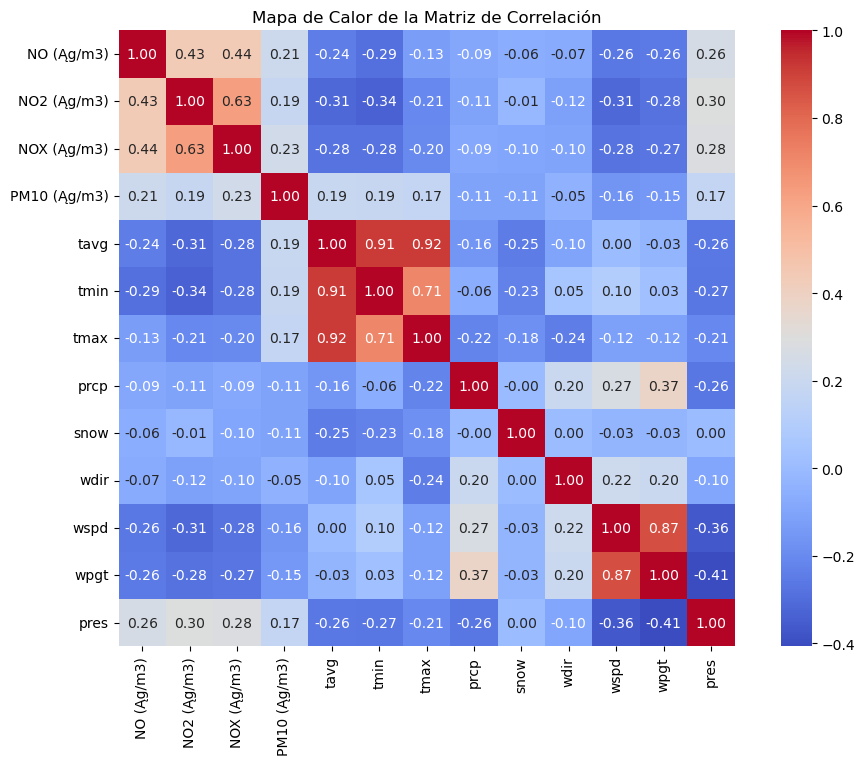

In [178]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Mapa de Calor de la Matriz de Correlación")
plt.show()


### Rojo oscuro: Correlaciones positivas fuertes.
### Azul oscuro: Correlaciones negativas fuertes.
### Colores intermedios: Correlaciones más débiles.


Fuertes correlaciones positivas:
tavg y tmax (correlación ≈ 0.92): La temperatura media (tavg) está altamente relacionada con la temperatura máxima (tmax).
tavg y tmin (correlación ≈ 0.91): La temperatura media también está altamente relacionada con la temperatura mínima (tmin).
wspd y wpgt (correlación ≈ 0.87): La velocidad del viento promedio (wspd) está muy relacionada con las ráfagas de viento (wpgt).

Moderadas correlaciones positivas:
NOX y NO2 (correlación ≈ 0.63): La concentración de óxidos de nitrógeno totales (NOX) está moderadamente relacionada con el dióxido de nitrógeno (NO2).
pres y NO (Ąg/m3) (correlación ≈ 0.26): La presión tiene una relación positiva débil con la concentración de óxidos de nitrógeno.

## Transformaciones necesarias:
### Limpieza de datos: Manejo de valores faltantes (imputación, eliminación).
### Estandarización o normalización de variables.
### Codificación de variables categóricas, si las hay (One-Hot Encoding o similares).
### Creación de características adicionales basadas en relaciones conocidas (e.g., interacción entre variables meteorológicas y contaminantes).


In [179]:
# Función para imputar los valores nulos por la media mensual de la ciudad
def imputar_mensual(df, ciudad, columna):
    for year in df['Date'].dt.year.unique():
        for month in range(1, 13):  # Iterar sobre los 12 meses
            # Filtrar por ciudad, año y mes directamente desde la columna 'Date'
            subset = df[(df['Ciudad'] == ciudad) & 
                        (df['Date'].dt.year == year) & 
                        (df['Date'].dt.month == month)]
            
            # Si hay datos en ese mes para ese año, usar la media de ese año
            if not subset[columna].isnull().all():
                mean_value = subset[columna].mean()
            else:
                # Si no hay datos para ese mes en ese año, calcular la media de otros años
                subset_other_years = df[(df['Ciudad'] == ciudad) & 
                                        (df['Date'].dt.month == month) & 
                                        (df['Date'].dt.year != year)]
                mean_value = subset_other_years[columna].mean() if not subset_other_years.empty else None
            
            # Si se pudo calcular una media, redondearla a un decimal y usarla para imputar
            if mean_value is not None:
                mean_value = round(mean_value, 1)
                df.loc[(df['Ciudad'] == ciudad) & 
                       (df['Date'].dt.year == year) & 
                       (df['Date'].dt.month == month) & 
                       (df[columna].isnull()), columna] = mean_value
            
    return df

# Columnas a imputar
numerical_cols = ['NO (Ąg/m3)', 'NO2 (Ąg/m3)', 'NOX (Ąg/m3)', 'PM10 (Ąg/m3)', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']

# Imputar para cada ciudad y columna
for ciudad in df['Ciudad'].unique():
    for col in numerical_cols:
        df = imputar_mensual(df, ciudad, col)

# Eliminar solo la columna 'snow' tiene demasiados valores faltantes
if 'snow' in df.columns and df['snow'].isnull().any():
    df = df.drop(columns=['snow'])

# Verificar si aún hay valores faltantes
print(df.isnull().sum())



Date            0
Ciudad          0
NO (Ąg/m3)      0
NO2 (Ąg/m3)     0
NOX (Ąg/m3)     0
PM10 (Ąg/m3)    0
tavg            0
tmin            0
tmax            0
prcp            0
wdir            0
wspd            0
wpgt            0
pres            0
dtype: int64


### Selección de características relevantes:
### Utiliza técnicas como análisis de correlación, selección basada en importancia de características (e.g., usando Random Forest), o PCA si los datos son muy dimensionales.

# lo de arriba no esta hecho porque no se si le viene bien 


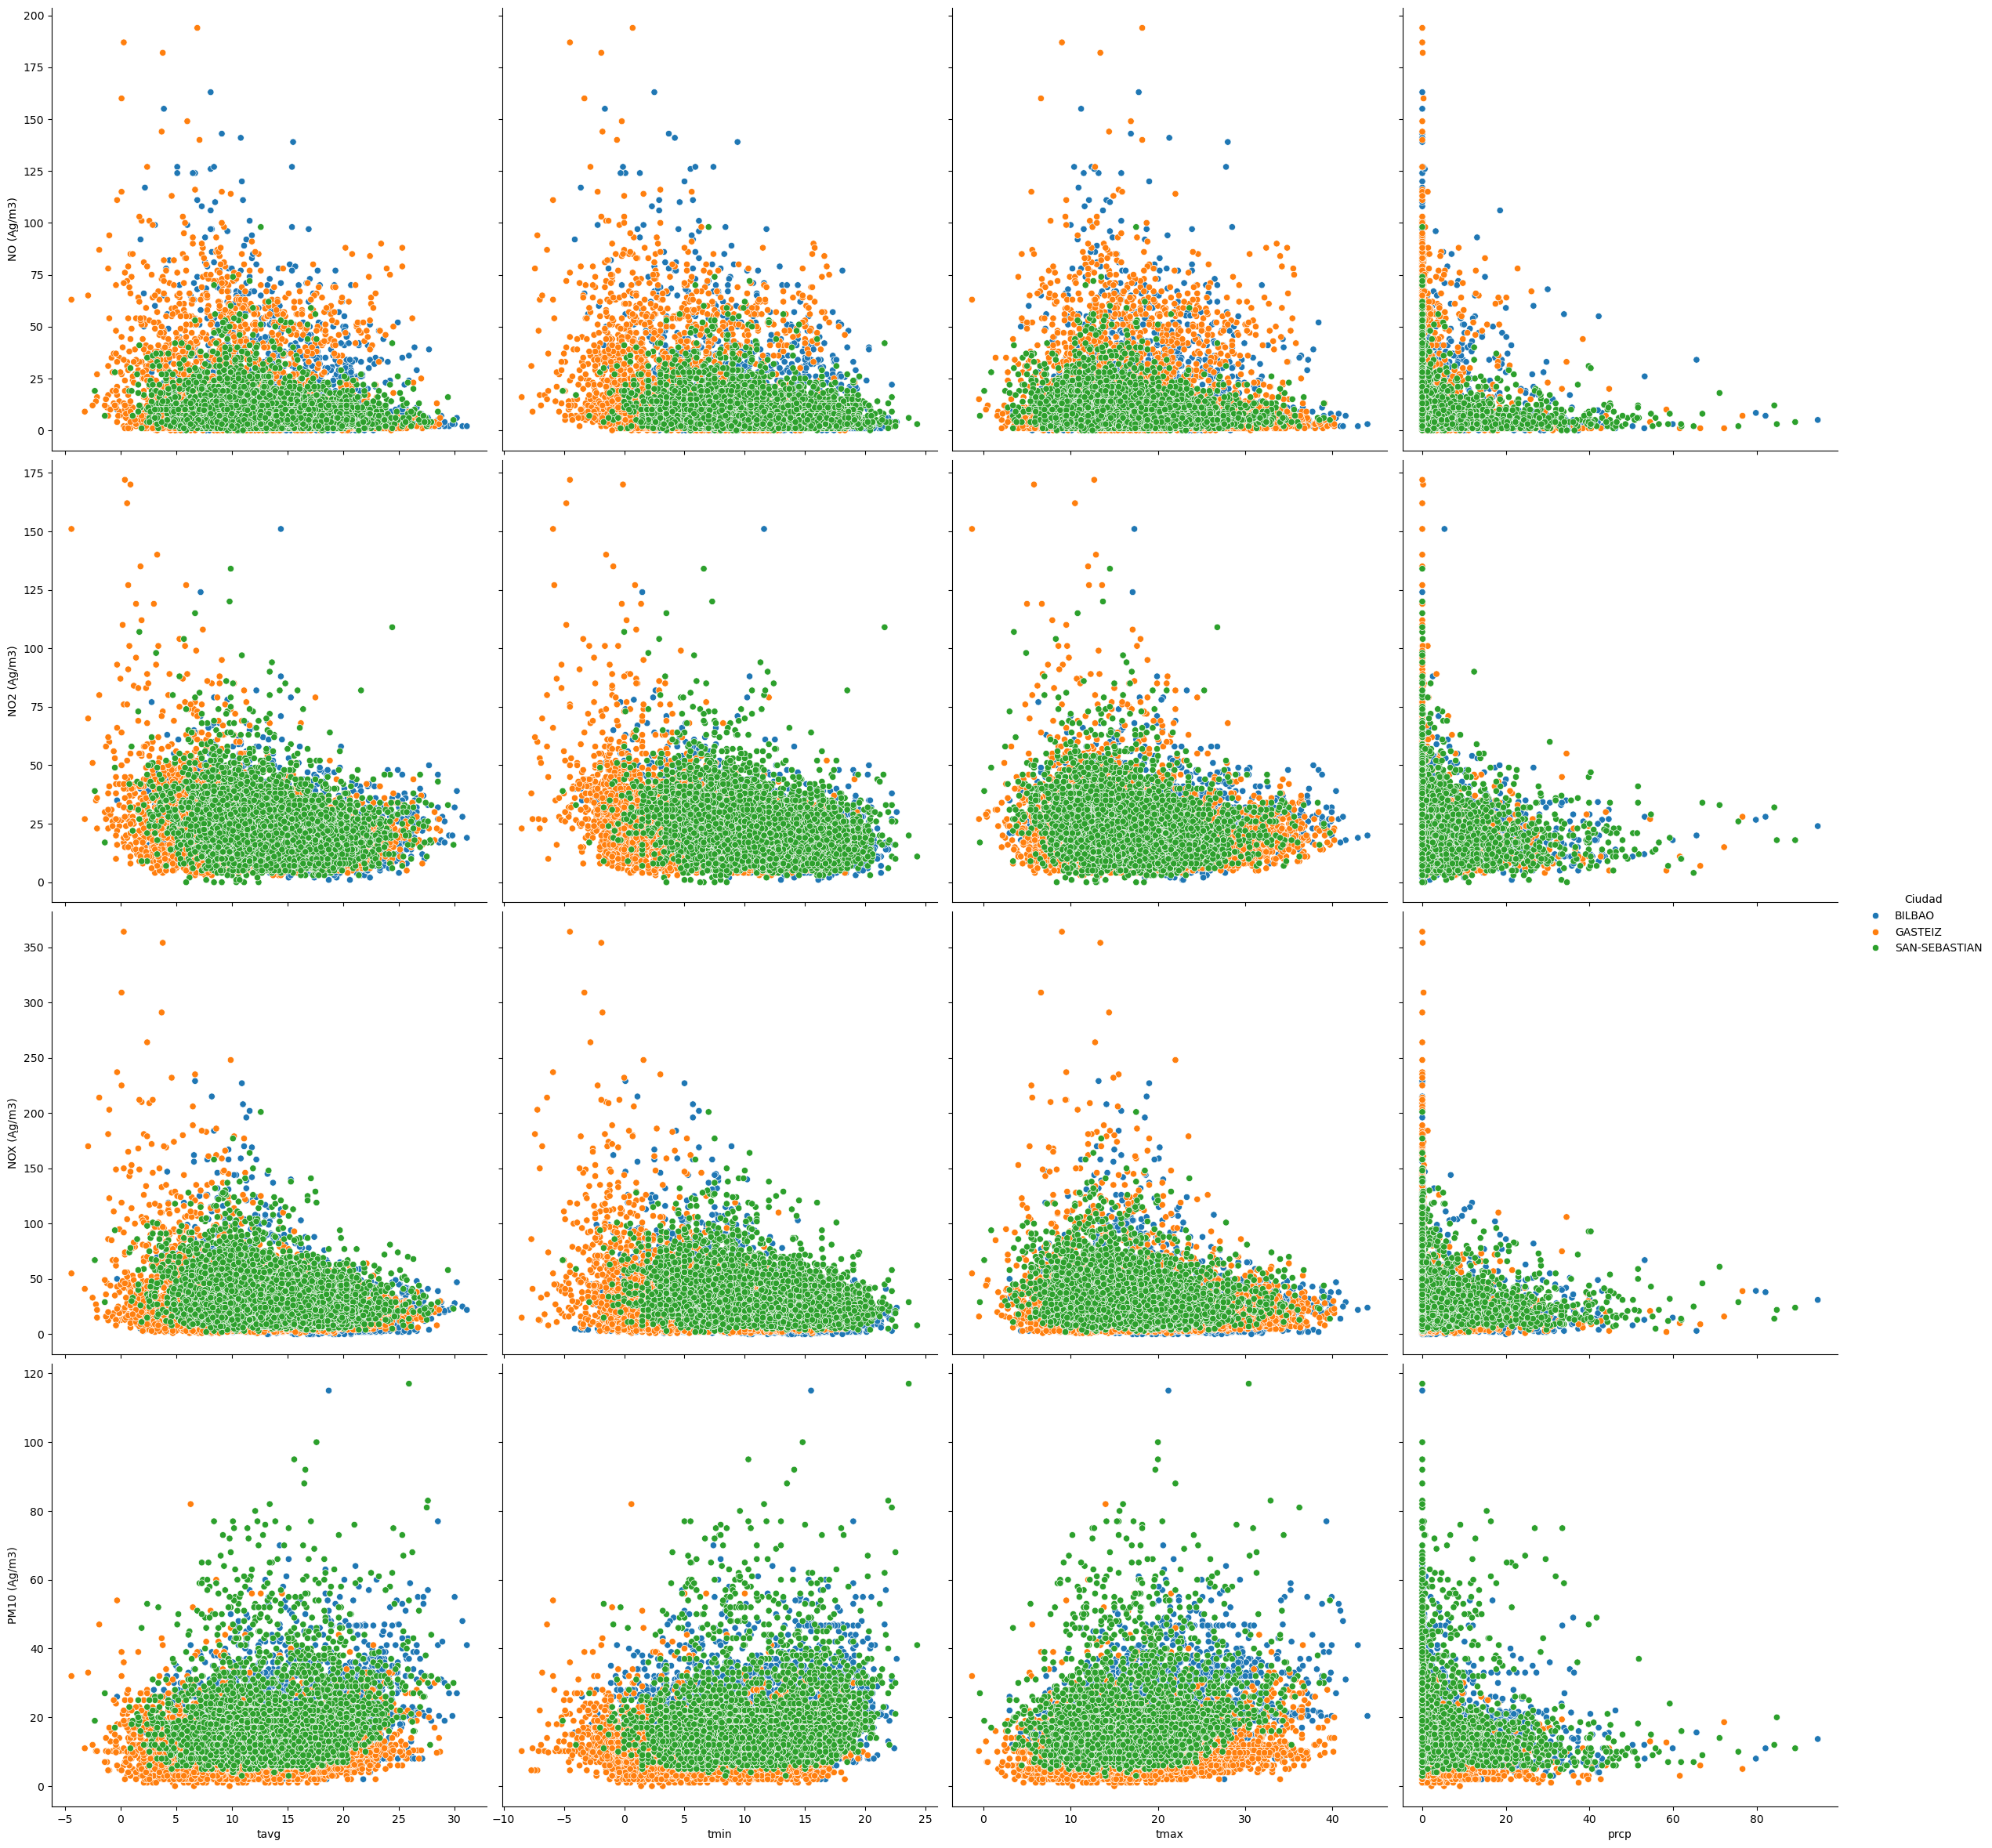

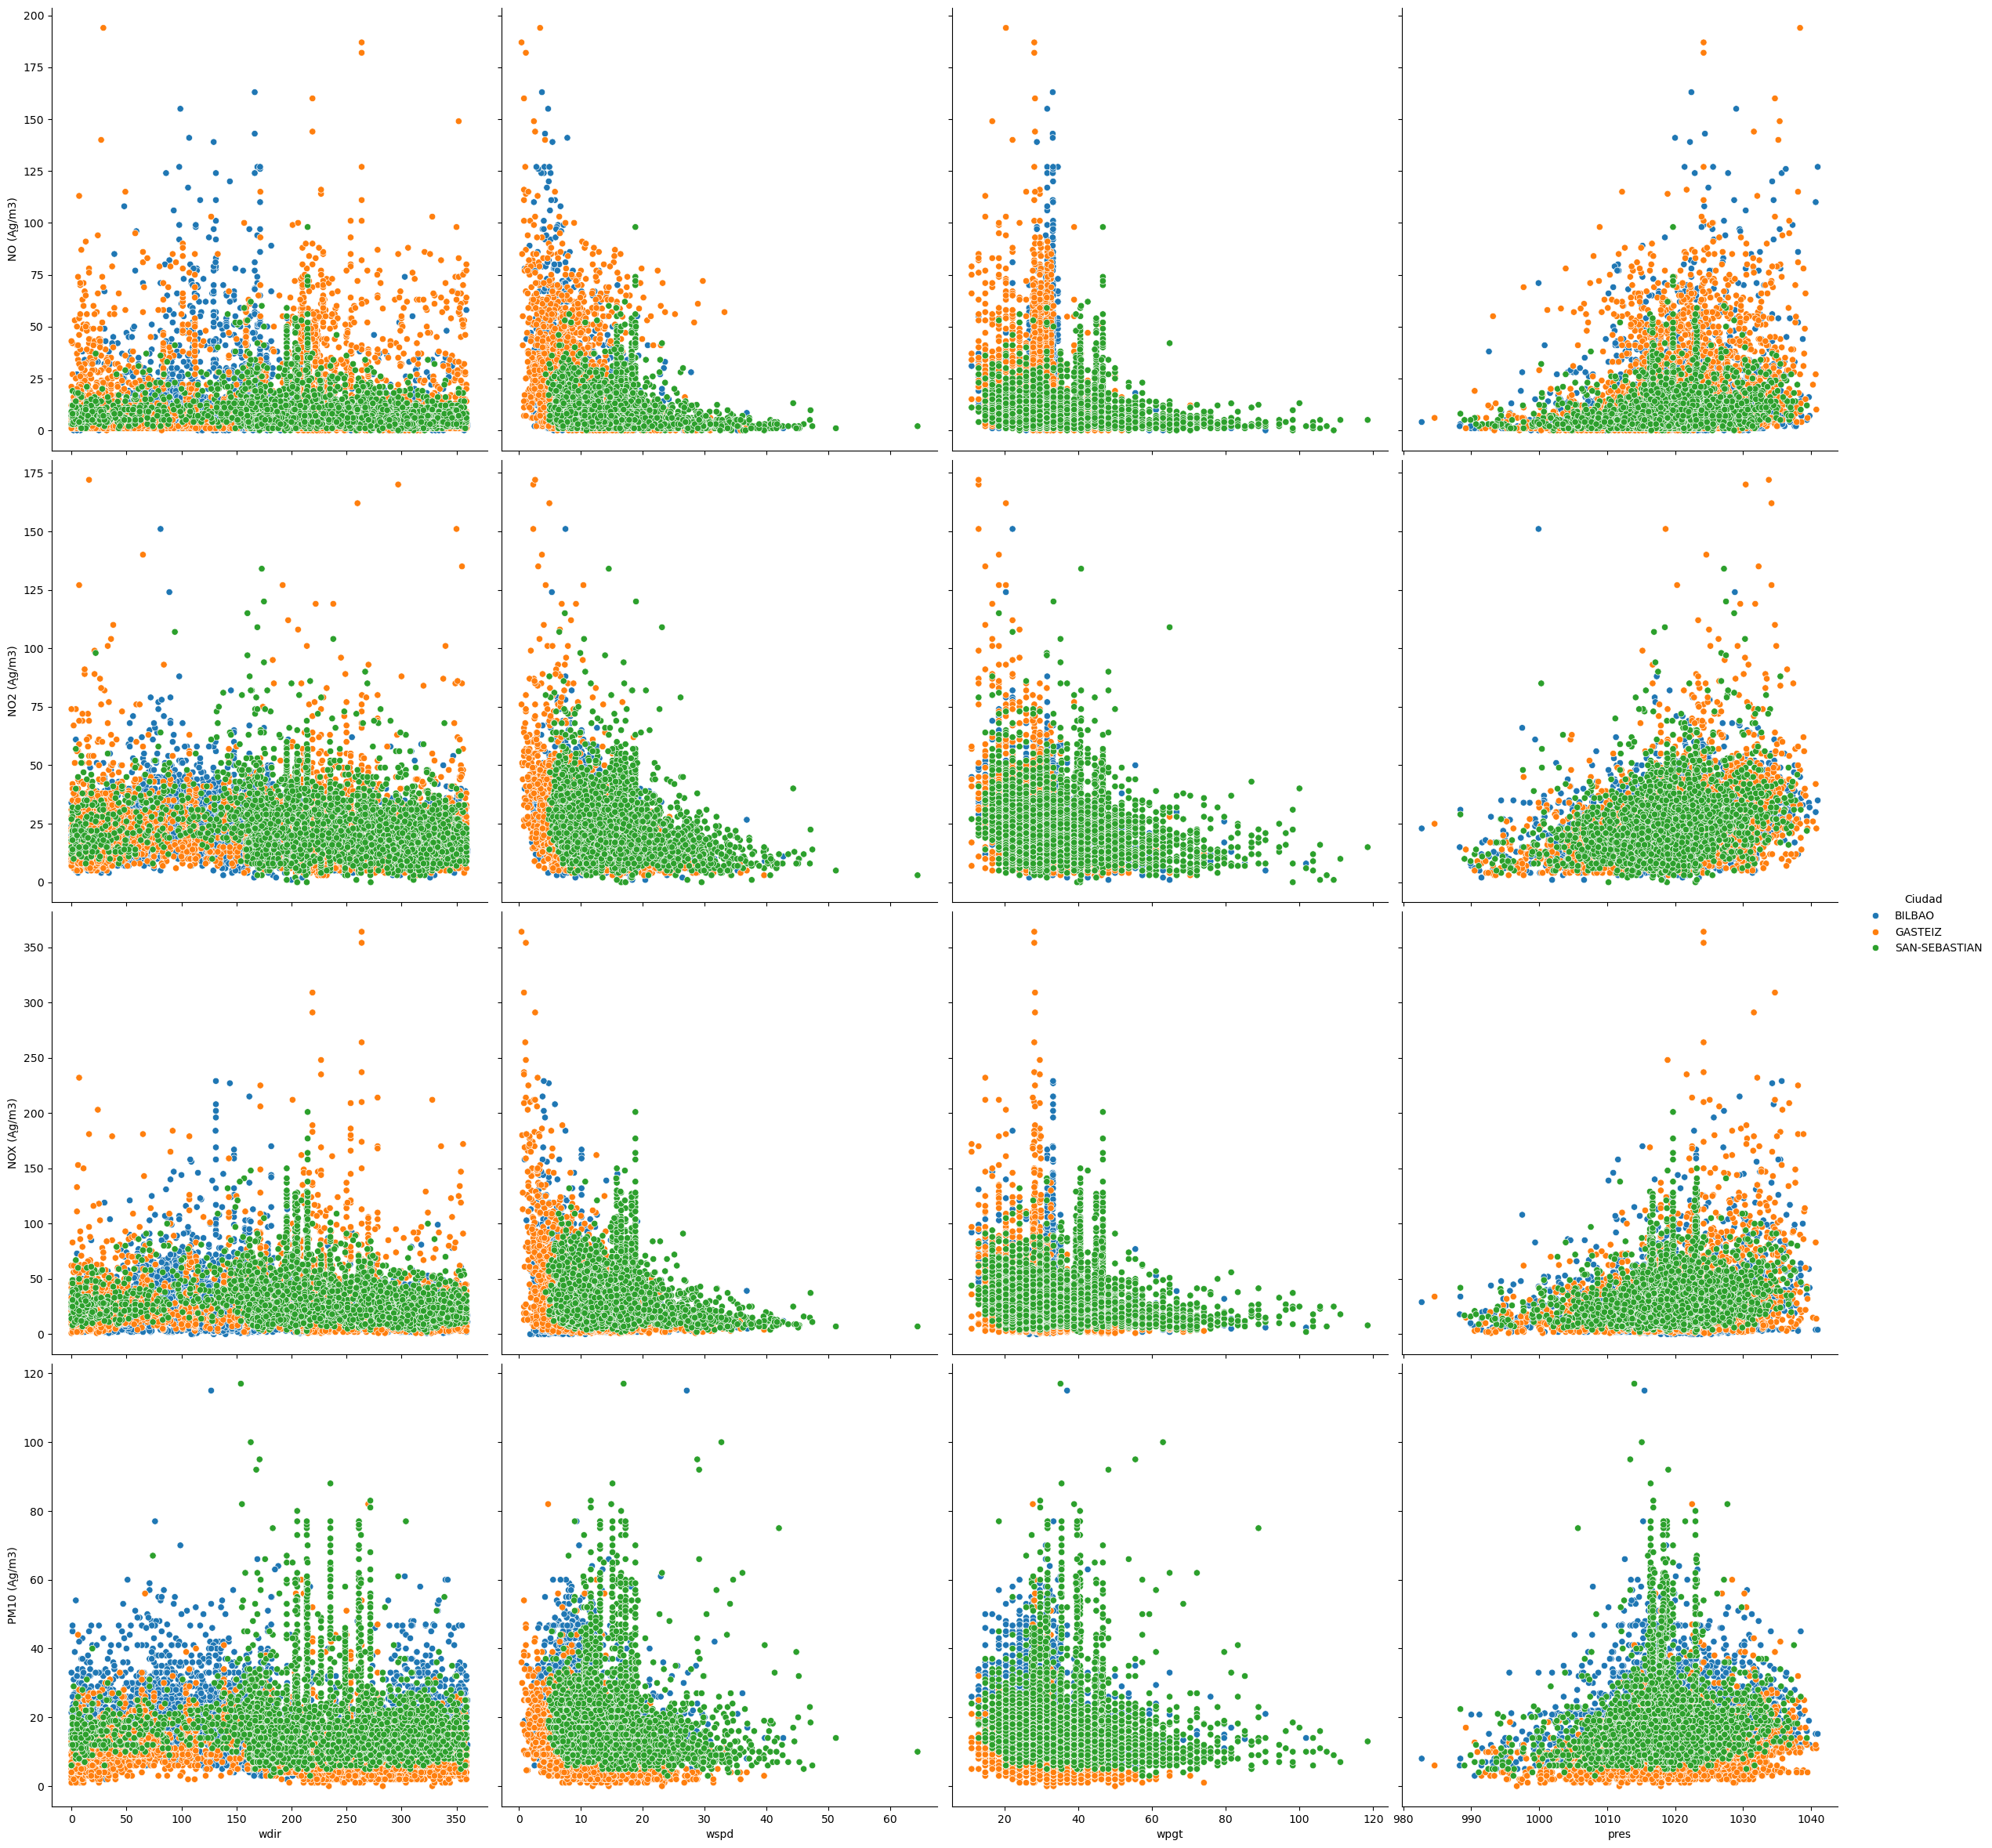

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grupo 1 de variables predictoras
sns.pairplot(df, 
             x_vars=['tavg', 'tmin', 'tmax', 'prcp'],  # Primer grupo de variables predictoras
             y_vars=['NO (Ąg/m3)', 'NO2 (Ąg/m3)', 'NOX (Ąg/m3)', 'PM10 (Ąg/m3)'],      # Contaminantes
             hue='Ciudad', 
             height=6, 
             aspect=1, 
             kind='scatter')
plt.show()

# Grupo 2 de variables predictoras
sns.pairplot(df, 
             x_vars=['wdir', 'wspd', 'wpgt', 'pres',],  # Segundo grupo de variables predictoras
             y_vars=['NO (Ąg/m3)', 'NO2 (Ąg/m3)', 'NOX (Ąg/m3)', 'PM10 (Ąg/m3)'],   # Contaminantes
             hue='Ciudad', 
             height=6, 
             aspect=1, 
             kind='scatter')
plt.show()

# Realizo onde-Hot encoding para las ciudades 
# Normalizar 
# definir x e y 
# dividir datos de entrenamiento y test 

In [181]:
# Codificar la columna `Ciudad` con One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Ciudad'], drop_first=False)

# Normalizar las variables predictoras
scaler = MinMaxScaler()
X = df_encoded[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']]
X_scaled = scaler.fit_transform(X)

# Definir las variables objetivo
y = df_encoded[['NO (Ąg/m3)', 'NO2 (Ąg/m3)', 'NOX (Ąg/m3)', 'PM10 (Ąg/m3)']]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

NameError: name 'MinMaxScaler' is not defined


# 2. Entrenamiento de Modelos de Regresión (IL2 - Nivel DESARROLLO)
## Selecciona al menos 5 modelos de regresión diferentes. Ejemplo:
- Regresión lineal.
- Árbol de decisión.
- Random Forest.
- XGBoost.
- Redes neuronales simples (MLP).

## Para cada modelo:
### Divide los datos en conjunto de entrenamiento (80%) y prueba (20%).
### Realiza una validación cruzada (k-fold) para evaluar el rendimiento en el conjunto de entrenamiento.
### Optimiza los hiperparámetros mediante Grid Search o Random Search.
## Documenta:
### Por qué eliges cada modelo.
### Cómo ajustas los parámetros y los hiperparámetros.


In [ ]:
# Crear un scorer para RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Definir los hiperparámetros de los modelos
parametros = {
    'Regresión Lineal': {},  # Sin hiperparámetros clave
    'Árbol de Decisión': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 10]
    },
    'Red Neuronal': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
}

# Modelos a optimizar
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Red Neuronal': MLPRegressor(max_iter=1000, random_state=42)
}

# TimeSeriesSplit para validación cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Optimización de hiperparámetros y almacenamiento de los mejores modelos
mejores_modelos = {}
for nombre, modelo in modelos.items():
    print(f"\nOptimizando {nombre}...")
    if parametros[nombre]:  # Si hay hiperparámetros definidos
        grid_search = GridSearchCV(estimator=modelo, param_grid=parametros[nombre], scoring=rmse_scorer, cv=tscv, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        mejores_modelos[nombre] = grid_search.best_estimator_
        print(f"Mejores parámetros para {nombre}: {grid_search.best_params_}")
    else:
        modelo.fit(X_train, y_train)
        mejores_modelos[nombre] = modelo
        print(f"{nombre} no requiere optimización de hiperparámetros.")


Realizando búsqueda de hiperparámetros para Regresión Lineal...
Regresión Lineal no requiere optimización de hiperparámetros.

Realizando búsqueda de hiperparámetros para Árbol de Decisión...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros para Árbol de Decisión: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Realizando búsqueda de hiperparámetros para Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros para Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Realizando búsqueda de hiperparámetros para XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros para XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Realizando búsqueda de hiperparámetros para Red Neuronal...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros para Red Neur


# 3. Evaluación de la Capacidad Predictiva de los Modelos (IL3 - Nivel APLICACIÓN)
## Evalúa cada modelo utilizando métricas clave:
- MAE (Mean Absolute Error): Para medir la magnitud promedio de los errores.
- RMSE (Root Mean Squared Error): Para dar mayor peso a los errores más grandes.
- R² (Coeficiente de determinación): Para explicar la variabilidad de los datos.
## Genera gráficos comparativos:
- urvas de predicción frente a valores reales.
- Importancia de características para los modelos como Random Forest y XGBoost.
## Reflexiona sobre el rendimiento:
### ¿Qué modelos son más precisos y por qué?
### ¿Qué variables influyen más en los resultados?


Evaluando Regresión Lineal...
Evaluando Árbol de Decisión...
Evaluando Random Forest...
Evaluando XGBoost...
Evaluando Red Neuronal...

Resultados de la Evaluación:
              Modelo  MAE Promedio  MSE Promedio  RMSE Promedio  R2 Promedio  \
0   Regresión Lineal     10.163646    249.950364      14.944325     0.145015   
1  Árbol de Decisión     11.923430    381.291749      18.658073    -0.365811   
2      Random Forest      8.879882    197.579782      13.402048     0.300181   
3            XGBoost      9.041580    205.182946      13.648320     0.273667   
4       Red Neuronal     10.458618    258.053433      15.248428     0.080824   

   Varianza Explicada Promedio  
0                     0.145772  
1                    -0.365033  
2                     0.301665  
3                     0.274305  
4                     0.179807  


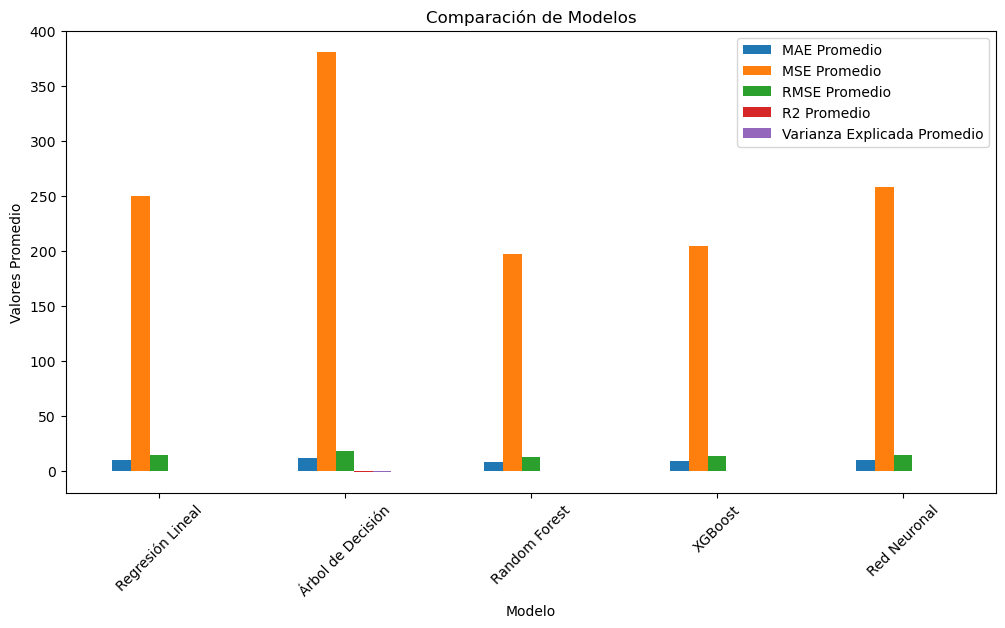

In [ ]:
# Crear scorers personalizados para las métricas
scorers = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'R2': make_scorer(r2_score),
    'Explained Variance': make_scorer(explained_variance_score)
}

# Evaluar los modelos con validación cruzada
resultados = []
for nombre, modelo in mejores_modelos.items():
    print(f"\nEvaluando {nombre}...")
    scores = cross_validate(modelo, X_train, y_train, cv=5, scoring=scorers)
    resultados.append({
        'Modelo': nombre,
        'MAE Promedio': scores['test_MAE'].mean(),
        'MSE Promedio': scores['test_MSE'].mean(),
        'RMSE Promedio': scores['test_RMSE'].mean(),
        'R2 Promedio': scores['test_R2'].mean(),
        'Varianza Explicada': scores['test_Explained Variance'].mean()
    })

# Mostrar resultados
resultados_df = pd.DataFrame(resultados)
print("\nResultados:")
print(resultados_df)

# Visualizar resultados
resultados_df.set_index('Modelo', inplace=True)
resultados_df.plot(kind='bar', figsize=(12, 8), title='Comparación de Modelos')
plt.ylabel('Valores Promedio')
plt.xticks(rotation=45)
plt.show()

# 4. Comparativa entre Modelos y Selección del Mejor Modelo (IL4 - Nivel APLICACIÓN)
### Presenta una tabla resumen con las métricas de cada modelo para cada contaminante.
## Fundamenta la selección del mejor modelo para cada contaminante:
### Considera precisión, velocidad de entrenamiento, y capacidad para generalizar.
## Discute las limitaciones de los modelos:
### ¿Hay suficiente representatividad en los datos?
### ¿Cómo podrían influir las características de los datos en el rendimiento?


# 5. Informe de Conclusiones y Reflexiones Finales (IL5 - Nivel DESARROLLO)
## Estructura sugerida:
## Introducción:
### Propósito del estudio.
### Descripción breve de los datos y contaminantes analizados.
## Preprocesamiento de datos:
### xplicación de las transformaciones realizadas y selección de características.
## Entrenamiento de modelos:
### Breve descripción de cada modelo y su optimización.
## Resultados y análisis:
### Evaluación detallada del rendimiento de cada modelo.
### Gráficos comparativos y tablas de métricas.
## Conclusiones:
### Selección del mejor modelo.
### eflexión sobre los resultados.
### Recomendaciones para mejorar futuros modelos.